## Car Price by Population - Data Analysis Project 
#### Peter Boster - CS-232
---
Looking for correlation between prices of car listings on Craigslist and population size of the listing location.

#### Hypothesis:
---
The bigger the population, the lower the car prices, due to higher competition and supply of used cars. The smaller the population, the higher the prices, due to scarcity of used cars in the area.

In [34]:
import sqlite3
import numpy as np
import pandas as pd
import datacollector
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model

### Step 1:
---
Convert sqlite database into a dataframe for Pandas, and use the id as the index key.

In [35]:
con = sqlite3.connect('cities.db')
df = pd.read_sql_query('SELECT * FROM listings', con)
df = df.set_index('id')
df

,url,price,location_pop
id,,,
1,https://bakersfield.craigslist.org/cto/d/baker...,7299,883053
2,https://bakersfield.craigslist.org/cto/d/baker...,6399,883053
3,https://bakersfield.craigslist.org/cto/d/steve...,1750,883053
4,https://bakersfield.craigslist.org/cto/d/baker...,3800,883053
5,https://bakersfield.craigslist.org/cto/d/baker...,2500,883053
...,...,...,...
27078,https://yubasutter.craigslist.org/cto/d/yuba-c...,12999,171365
27079,https://yubasutter.craigslist.org/cto/d/burney...,23000,171365
27080,https://yubasutter.craigslist.org/cto/d/yuba-c...,5000,171365


In [36]:
df.shape

(27082, 3)

Next I create a subset of the original dataframe that just uses id, price and location population. And a box plot for price because I want to see what prices seem unrealistic.

In [37]:
subset = df[['price', 'location_pop']]
subset

,price,location_pop
id,,
1,7299,883053
2,6399,883053
3,1750,883053
4,3800,883053
5,2500,883053
...,...,...
27078,12999,171365
27079,23000,171365
27080,5000,171365


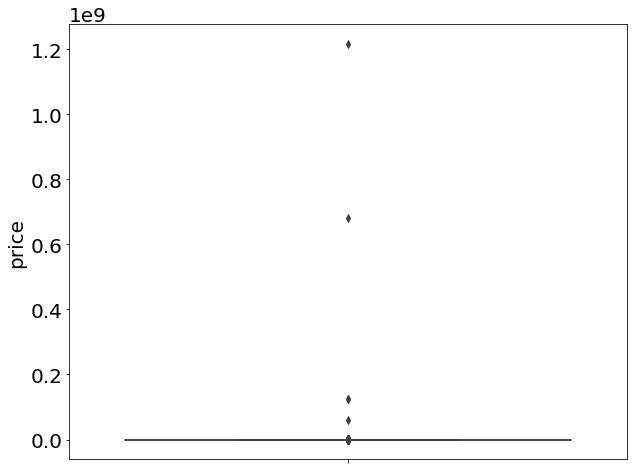

In [38]:
sns.boxplot(y=subset['price'])

1.2 x 10^9 is way to high to be a real price, so I will remove all prices above 100,000, as those cars are more likely to be new.

In [39]:
def removal_function(df):
    for index, row in df.iterrows():
        if int(row['price']) > 100000:
            df.drop(index, inplace=True)
    return df

In [40]:
new_df = removal_function(subset)
new_df.shape

/Users/peterboster/Desktop/Courses/CS-232/car-data-analysis/venv/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(27023, 2)

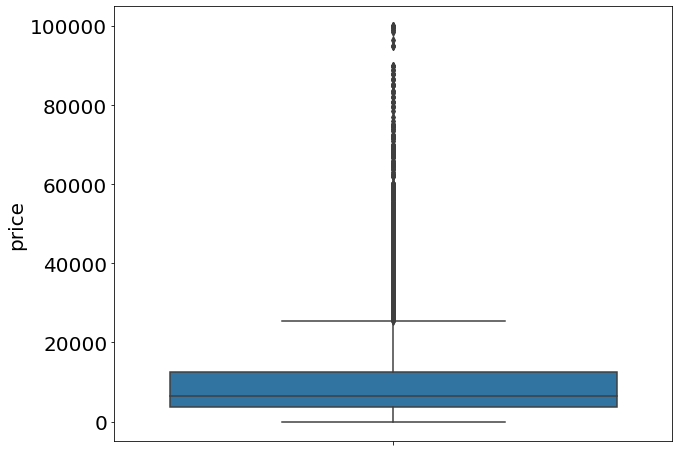

In [41]:
sns.boxplot(y=subset['price'])

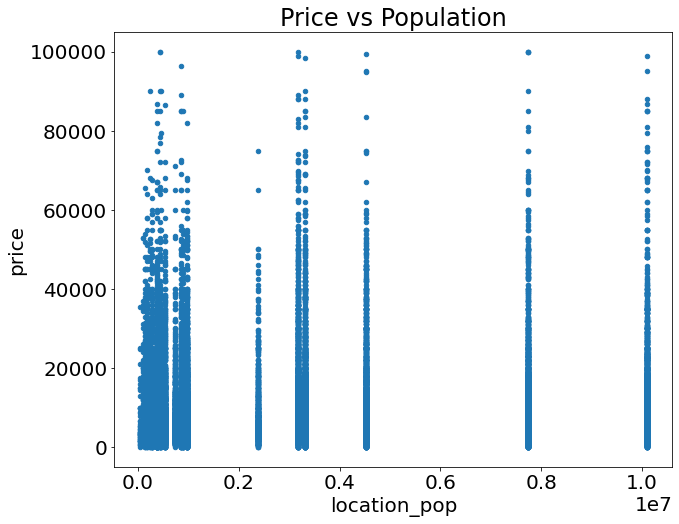

In [42]:
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})
new_df.plot(kind='scatter', x='location_pop', y='price', title='Price vs Population');

In [43]:
new_df.corr()

,price,location_pop
price,1.00000,0.01146
location_pop,0.01146,1.00000


In [44]:
X = new_df['location_pop'] ## population is independent
y = new_df['price']        ## price is dependent
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.254
Model:                            OLS   Adj. R-squared (uncentered):              0.254
Method:                 Least Squares   F-statistic:                              9199.
Date:                Wed, 11 Mar 2020   Prob (F-statistic):                        0.00
Time:                        21:29:55   Log-Likelihood:                     -2.9359e+05
No. Observations:               27023   AIC:                                  5.872e+05
Df Residuals:                   27022   BIC:                                  5.872e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
location_pop     0.0016   1.64e-05     95.912      0.000       0.002       0.002
==============================================================================
Omnibus:                    11640.914   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76160.042
Skew:                           1.960   Prob(JB):                         0.00
Kurtosis:                      10.231   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion:
---
After collecting and looking at the craigslist data in California, I have come to a couple of conclusions. First of all, assuming my data collection methods were accurate, and that the data was properly distributed, the correlation between price and loaction population was 0.01146. This indicates that there was essentially no correlation between the two variables. However, I do not think that my collection of data gave an accurate representation, and that the population was not disributed accurately. I don't think that my collection gave an accurate representation because there are more areas with lower populations than there are with higher populations. You can see this on the scatter plot where there are huge gaps between the high population areas, as opposed to the far smaller gaps between areas between 0 and 200,000. I think that these errors skewed the results a bit, making then less accurate.

Although I think that this analysis was incorrect, I do believe that I could improve my results by collecting data from across the country, or by limiting makes of cars and looking at data from just one make.